In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [312]:
df = pd.read_csv('Data/world_cups.csv')
dfm = pd.read_csv('Data/world_cup_matches.csv')
#Cruzar las tablas
df = df.merge(dfm, left_on='Year', right_on='Year', how='left')
df.head(10)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played,ID,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Host Team
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1,1930/7/13,Group stage,France,4,1,Mexico,France,Mexico,NaN,False
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,2,1930/7/13,Group stage,United States,3,0,Belgium,United States,Belgium,NaN,False
2,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,3,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,Yugoslavia,Brazil,NaN,False
3,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,4,1930/7/14,Group stage,Romania,3,1,Peru,Romania,Peru,NaN,False
4,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,5,1930/7/15,Group stage,Argentina,1,0,France,Argentina,France,NaN,False
5,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,6,1930/7/16,Group stage,Chile,3,0,Mexico,Chile,Mexico,NaN,False
6,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,7,1930/7/17,Group stage,Yugoslavia,4,0,Bolivia,Yugoslavia,Bolivia,NaN,False
7,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,8,1930/7/17,Group stage,United States,3,0,Paraguay,United States,Paraguay,NaN,False
8,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,9,1930/7/18,Group stage,Uruguay,1,0,Peru,Uruguay,Peru,NaN,True
9,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,10,1930/7/19,Group stage,Chile,1,0,France,Chile,France,NaN,False


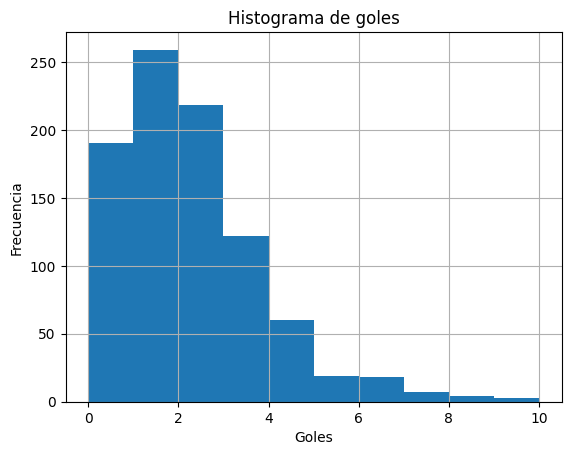

In [313]:
#Histograma de goles de local
df['Home Goals'].hist(bins=10)
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.title('Histograma de goles')
plt.show()



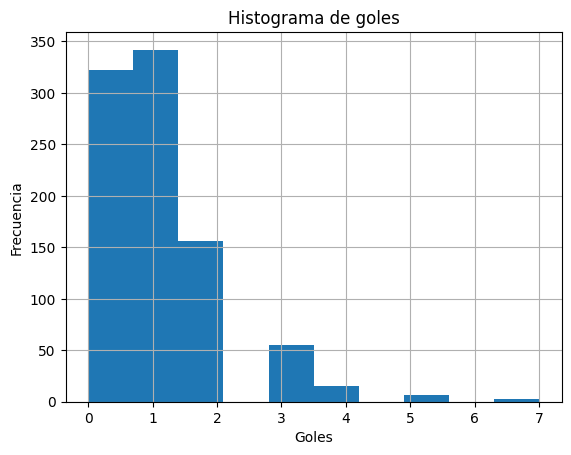

In [314]:
#Histograma de goles de visitante
df['Away Goals'].hist(bins=10)
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.title('Histograma de goles')
plt.show()

<AxesSubplot:>

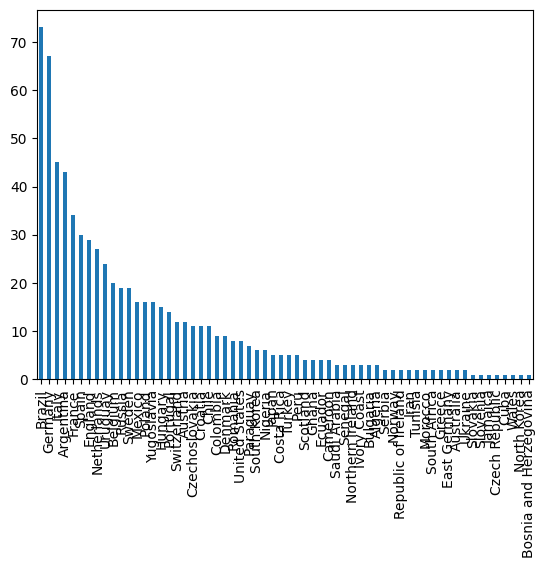

In [315]:
#Diagrama de barras de ganadores en partidos de mundiales
df['Winning Team'].value_counts().plot(kind='bar')

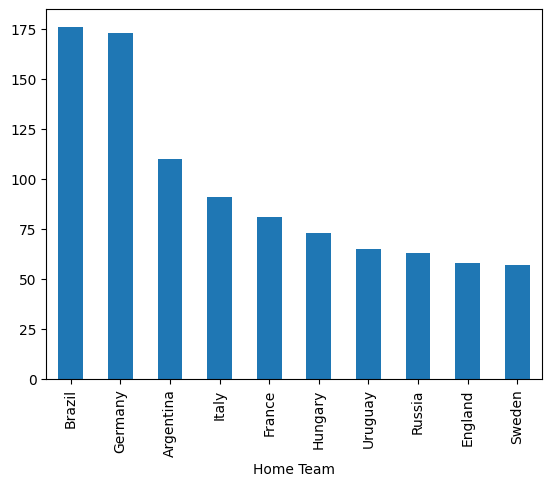

In [316]:
#grafica de los goles por equipo
df.groupby('Home Team')['Home Goals'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.show()

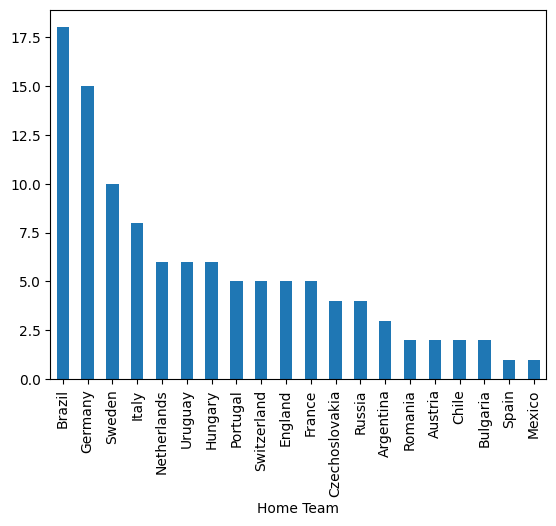

In [317]:
#grafica de los goles en cuartos de final por equipo
df[df['Stage']=='Quarter-finals'].groupby('Home Team')['Home Goals'].sum().sort_values(ascending=False).head(20).plot.bar()
plt.show()

<AxesSubplot:>

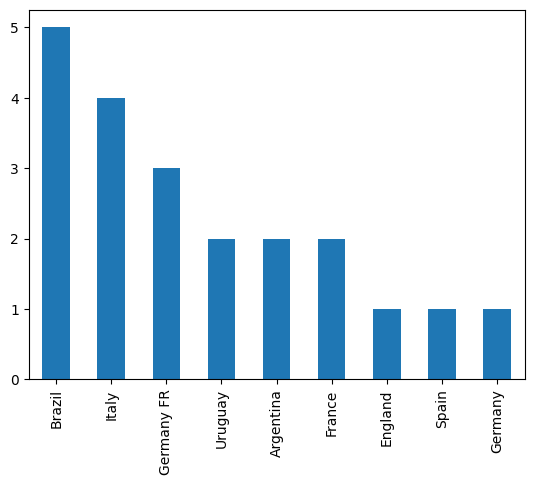

In [318]:
#Diagrama de barras de ganadores de mundiales
df = pd.read_csv('Data/world_cups.csv')
df['Winner'].value_counts().plot(kind='bar')

<AxesSubplot:>

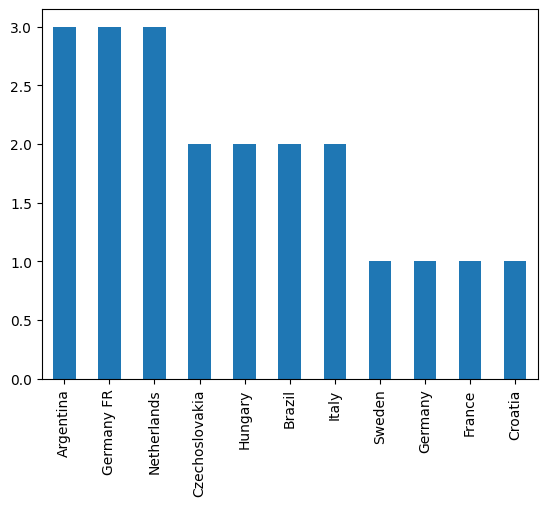

In [319]:
#Diagrama de barras de subcampeones de mundiales
df['Runners-Up'].value_counts().plot(kind='bar')

<AxesSubplot:>

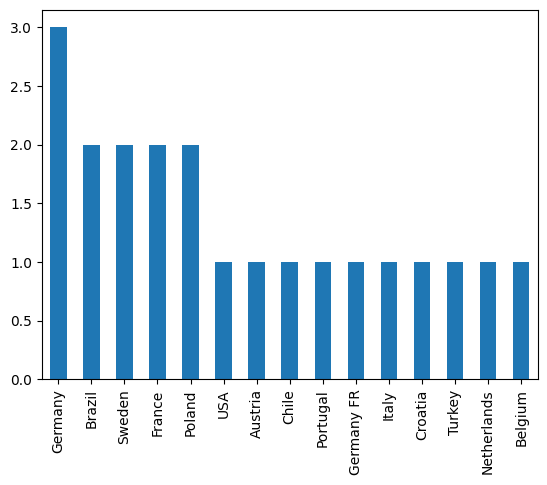

In [320]:
#Diagrama de barras de terceros lugares de mundiales
df['Third'].value_counts().plot(kind='bar')

<AxesSubplot:>

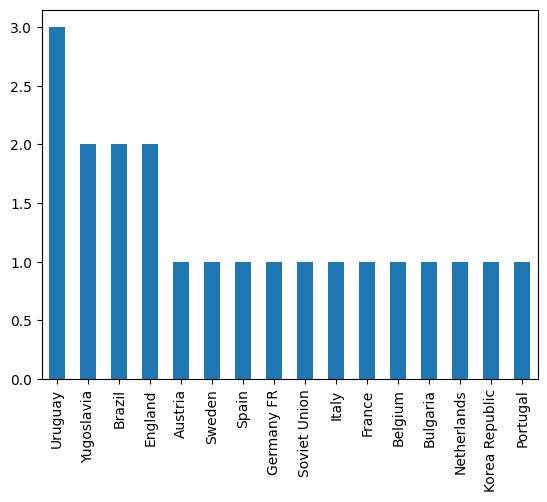

In [321]:
#Diagrama de barras de cuartos lugares de mundiales
df['Fourth'].value_counts().plot(kind='bar')

In [322]:
#Coincidimos en que el cuarto lugar no afecta tanto, puesto que esos países no se ven involucrados en su mayopría como campeones o subcampeones
#Por lo que se puede eliminar esa columna
#También se podrían eliminar los países que menos partidos han ganado en mundiales, puesto que no se ven involucrados en las etapas finales
#De momento se eliminarán los países que menos partidos han ganado en mundiales
#Los goles son un poco ambiguos, puesto que subir de los 2 goles es muy poco probable, por lo que se eliminarán los goles
#Los equipos visitantes suelen estar ahí en vista de la clasificación del futbol de peor contra mejor
#Por lo que se ve que hacen menos goles, no tienen mucha relevancia
#Sin embargo, no eliminamos goles porque se ve que los equipos que más goles anotan, suelen ganar más mundiales, tales cómo Brasil

In [323]:
df = pd.read_csv('Data/world_cups.csv')
dfm = pd.read_csv('Data/world_cup_matches.csv')
#Cruzar las tablas
df = df.merge(dfm, left_on='Year', right_on='Year', how='left')

In [324]:
del df['Win Conditions']
del df['Host Team']
df.head(5)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played,ID,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1,1930/7/13,Group stage,France,4,1,Mexico,France,Mexico
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,2,1930/7/13,Group stage,United States,3,0,Belgium,United States,Belgium
2,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,3,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,Yugoslavia,Brazil
3,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,4,1930/7/14,Group stage,Romania,3,1,Peru,Romania,Peru
4,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,5,1930/7/15,Group stage,Argentina,1,0,France,Argentina,France


In [325]:
#poner la fecha como el dia de la semana y pasarlo a numero
#quitar el cuarto
#label encoder pa lo de la semana
#label encoder pa la stage
#one hot encoder pa el resto
#cambiar lo de ganar por 1 y perder por 0 y empate por 0.5

In [326]:
def determinar_resultado(row):
    if row['Winning Team'] == row['Away Team']:
        return 0
    elif row['Winning Team'] == row['Home Team']:
        return 1
    else:
        return 0.5

In [327]:
df['Result'] = df.apply(determinar_resultado, axis=1)


In [328]:
del df['Winning Team']


In [329]:
del df['Losing Team']


In [330]:
del df['ID']

In [331]:
df.head(10)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/13,Group stage,France,4,1,Mexico,1.0
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/13,Group stage,United States,3,0,Belgium,1.0
2,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/14,Group stage,Romania,3,1,Peru,1.0
4,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/15,Group stage,Argentina,1,0,France,1.0
5,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/16,Group stage,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/17,Group stage,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/17,Group stage,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/18,Group stage,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/19,Group stage,Chile,1,0,France,1.0


In [332]:
del df['Host Country']

In [333]:
del df['Fourth']

In [334]:
def sustituirDia(row):
    # Convierte la cadena en un objeto datetime
    fecha_obj = datetime.strptime(row['Date'], "%Y/%m/%d")

    # Obtiene el nombre del día de la semana
    return fecha_obj.strftime("%A")

In [335]:
df['Date'] = df.apply(sustituirDia, axis=1)

In [336]:
df.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Argentina,USA,70,13,18,Sunday,Group stage,France,4,1,Mexico,1.0
1,1930,Uruguay,Argentina,USA,70,13,18,Sunday,Group stage,United States,3,0,Belgium,1.0
2,1930,Uruguay,Argentina,USA,70,13,18,Monday,Group stage,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Argentina,USA,70,13,18,Monday,Group stage,Romania,3,1,Peru,1.0
4,1930,Uruguay,Argentina,USA,70,13,18,Tuesday,Group stage,Argentina,1,0,France,1.0
5,1930,Uruguay,Argentina,USA,70,13,18,Wednesday,Group stage,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Argentina,USA,70,13,18,Thursday,Group stage,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Argentina,USA,70,13,18,Thursday,Group stage,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Argentina,USA,70,13,18,Friday,Group stage,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Argentina,USA,70,13,18,Saturday,Group stage,Chile,1,0,France,1.0


In [337]:

# Label encoder
week_days = {
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday': 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}


In [338]:
def sustituirDia(row):
    return week_days[row['Date']]

In [339]:
df['Date'] = df.apply(sustituirDia, axis=1)
df.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Argentina,USA,70,13,18,6,Group stage,France,4,1,Mexico,1.0
1,1930,Uruguay,Argentina,USA,70,13,18,6,Group stage,United States,3,0,Belgium,1.0
2,1930,Uruguay,Argentina,USA,70,13,18,0,Group stage,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Argentina,USA,70,13,18,0,Group stage,Romania,3,1,Peru,1.0
4,1930,Uruguay,Argentina,USA,70,13,18,1,Group stage,Argentina,1,0,France,1.0
5,1930,Uruguay,Argentina,USA,70,13,18,2,Group stage,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Argentina,USA,70,13,18,3,Group stage,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Argentina,USA,70,13,18,3,Group stage,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Argentina,USA,70,13,18,4,Group stage,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Argentina,USA,70,13,18,5,Group stage,Chile,1,0,France,1.0


In [340]:
def equivalenciaStage(row):
    if(row['Stage'] == 'First group stage' or row['Stage'] == 'First round'):
        return 'Group stage'
    elif(row['Stage'] == 'Second group stage' or row['Stage'] == 'Final round'):
        return 'Round of 16'
    else:
        return row['Stage']

In [341]:
df['Stage'] = df.apply(equivalenciaStage, axis=1)

In [342]:
stages = {
    'Group stage' : 0,
    'Round of 16' : 1,
    'Quarter-finals' : 2,
    'Semi-finals' : 3,
    'Third place' : 4,
    'Final' : 5
}
def sustituirStage(row):
    return stages[row['Stage']]

In [343]:
df['Stage'] = df.apply(sustituirStage, axis=1)

In [344]:
df.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Argentina,USA,70,13,18,6,0,France,4,1,Mexico,1.0
1,1930,Uruguay,Argentina,USA,70,13,18,6,0,United States,3,0,Belgium,1.0
2,1930,Uruguay,Argentina,USA,70,13,18,0,0,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Argentina,USA,70,13,18,0,0,Romania,3,1,Peru,1.0
4,1930,Uruguay,Argentina,USA,70,13,18,1,0,Argentina,1,0,France,1.0
5,1930,Uruguay,Argentina,USA,70,13,18,2,0,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Argentina,USA,70,13,18,3,0,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Argentina,USA,70,13,18,3,0,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Argentina,USA,70,13,18,4,0,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Argentina,USA,70,13,18,5,0,Chile,1,0,France,1.0
